In [26]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import math
import numpy as np
from datetime import datetime 
import seaborn as sns 


In [27]:


api_url = "your url"
headers = {
    "Authorization": "Bearer YOUR_API_KEY"
}


response = requests.get(api_url, headers=headers)

if response.status_code == 200:
    
    data = response.json()
    df = pd.DataFrame(data)

    
    print(df)
else:
    print("API'den veri alınamadı. Hata kodu:", response.status_code)


   collectTime value
0    02-AUG-23    23
1    03-AUG-23    39
2    04-AUG-23    23
3    05-AUG-23    23
4    06-AUG-23    23
5    07-AUG-23    23
6    08-AUG-23    22
7    09-AUG-23    20
8    10-AUG-23    24
9    11-AUG-23    27
10   12-AUG-23    27
11   13-AUG-23    27
12   14-AUG-23    31
13   15-AUG-23    35
14   16-AUG-23    52
15   17-AUG-23    73
16   18-AUG-23    82
17   19-AUG-23    82
18   20-AUG-23    82
19   21-AUG-23    78
20   22-AUG-23    78
21   23-AUG-23    82
22   24-AUG-23    82
23   25-AUG-23    71
24   26-AUG-23    71
25   27-AUG-23    71
26   28-AUG-23    38
27   29-AUG-23    30
28   30-AUG-23    30
29   31-AUG-23    18
30   01-SEP-23    18
31   02-SEP-23    29
32   03-SEP-23    29
33   04-SEP-23    23
34   05-SEP-23    20
35   06-SEP-23    22
36   07-SEP-23    19
37   08-SEP-23    18
38   09-SEP-23    18
39   10-SEP-23    18
40   11-SEP-23    18
41   12-SEP-23    22
42   13-SEP-23    23
43   14-SEP-23    17
44   15-SEP-23    25
45   16-SEP-23    27
46   17-SEP-2

In [28]:
df.head()

,collectTime,value
0,02-AUG-23,23
1,03-AUG-23,39
2,04-AUG-23,23
3,05-AUG-23,23
4,06-AUG-23,23


In [29]:
df['collectTime'] = pd.to_datetime(df['collectTime'])
df.set_index( 'collectTime' ,inplace=True)
df.head()

,value
collectTime,
2023-08-02,23
2023-08-03,39
2023-08-04,23
2023-08-05,23
2023-08-06,23


In [30]:
df['value'] = pd.to_numeric(df['value'], errors='coerce', downcast='integer')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2023-08-02 to 2023-09-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   48 non-null     int8 
dtypes: int8(1)
memory usage: 432.0 bytes


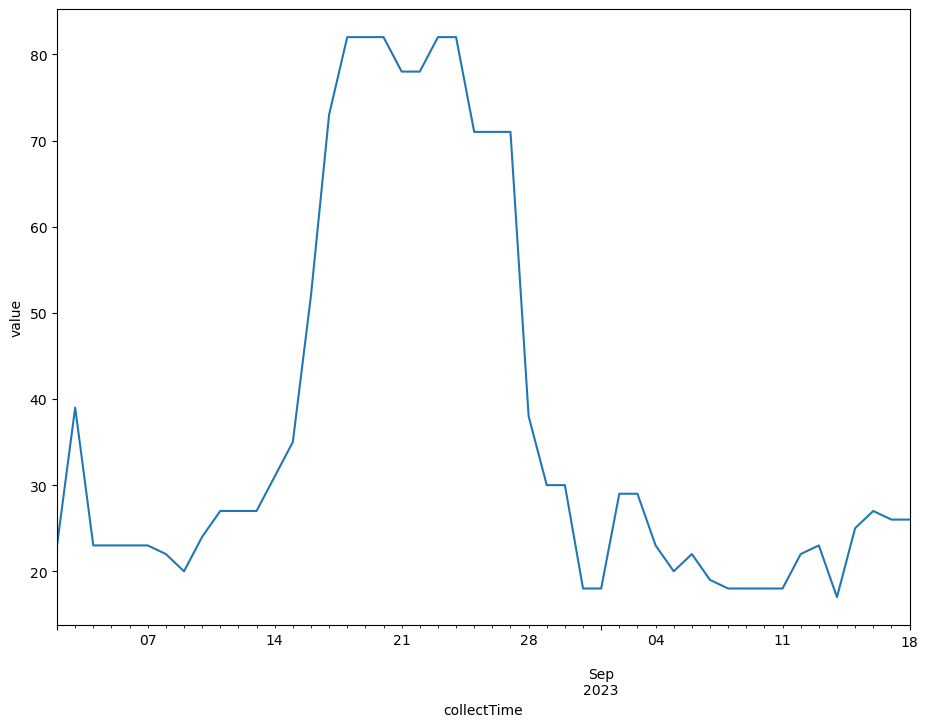

In [32]:
plt.figure(figsize=(11,8)) 
df['value'].plot()
plt.xlabel('collectTime') 
plt.ylabel('value') 
plt.show()

In [33]:
forecast_out = int(math.ceil(0.10 * len(df))) # Forecasting out 5% of the entire dataset 

print(forecast_out)
df['label'] = df['value'].shift(-forecast_out)

5


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [35]:
scaler = StandardScaler()
x = np.array(df.drop(['label'],1))
scaler.fit(x)
x = scaler.transform(x)

C:\Users\TOYGUNOZYUREK\AppData\Local\Temp\ipykernel_1144\1057860552.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['label'],1))


In [36]:
x_predictions = x [forecast_out:] # Data to be predicted 
x = x[:-forecast_out] # Data to be trained 

In [37]:
df.dropna(inplace = True)
y = np.array(df['label'])

In [38]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [39]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_confidence = lr.score(x_train,y_train)
print(lr_confidence)

0.35547233921963717


In [40]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_confidence = rf.score(x_train,y_train)
print(rf_confidence)

0.7910820213994053


In [41]:
rg = Ridge()
rg.fit(x_train,y_train)
rg_confidence = rg.score(x_train,y_train)
print(rg_confidence)

0.3552376797822475


In [42]:
svr = SVR()
svr.fit(x_train,y_train)
svr_confidence = svr.score(x_train,y_train)
print(svr_confidence)

-0.016586191646014603


In [43]:
names = ['Linear Regression','Random Forest','Ridge','SVR']
columns = ['model','accuracy']
scores = [lr_confidence, rf_confidence, rg_confidence, svr_confidence]
alg_vs_score = pd.DataFrame([[x,y] for x, y in zip(names,scores)], columns = columns)
alg_vs_score

,model,accuracy
0,Linear Regression,0.355472
1,Random Forest,0.791082
2,Ridge,0.355238
3,SVR,-0.016586


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Ridge'),
  Text(3, 0, 'SVR')])

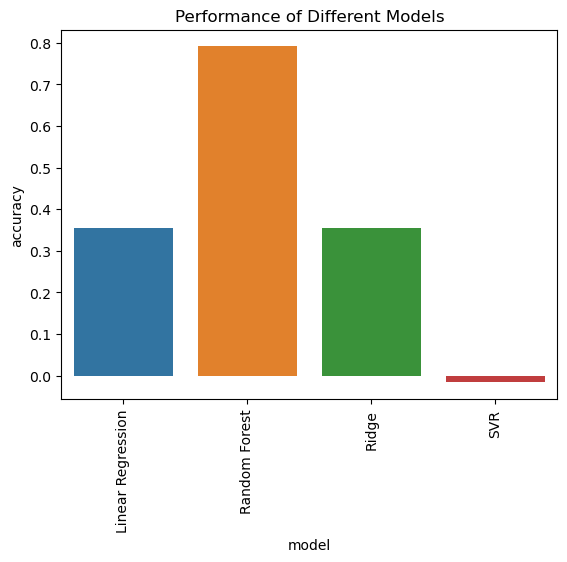

In [44]:
sns.barplot(data = alg_vs_score , x = 'model', y = 'accuracy')
plt.title('Performance of Different Models')
plt.xticks(rotation ='vertical')

In [45]:
last_date = df.index[-1] #Getting the lastdate in dataset
last_unix = last_date.timestamp() #Converting it to time in seconds 
one_day = 86400 # one day equals 86400 seconds 
next_unix = last_unix + one_day # Getting the time in seconds for the next day 

forecast_set = rf.predict(x_predictions) # Predicting forecast data
df['forecast'] = np.nan 

for i in forecast_set : 
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range( len(df.columns)-1)] + [i]

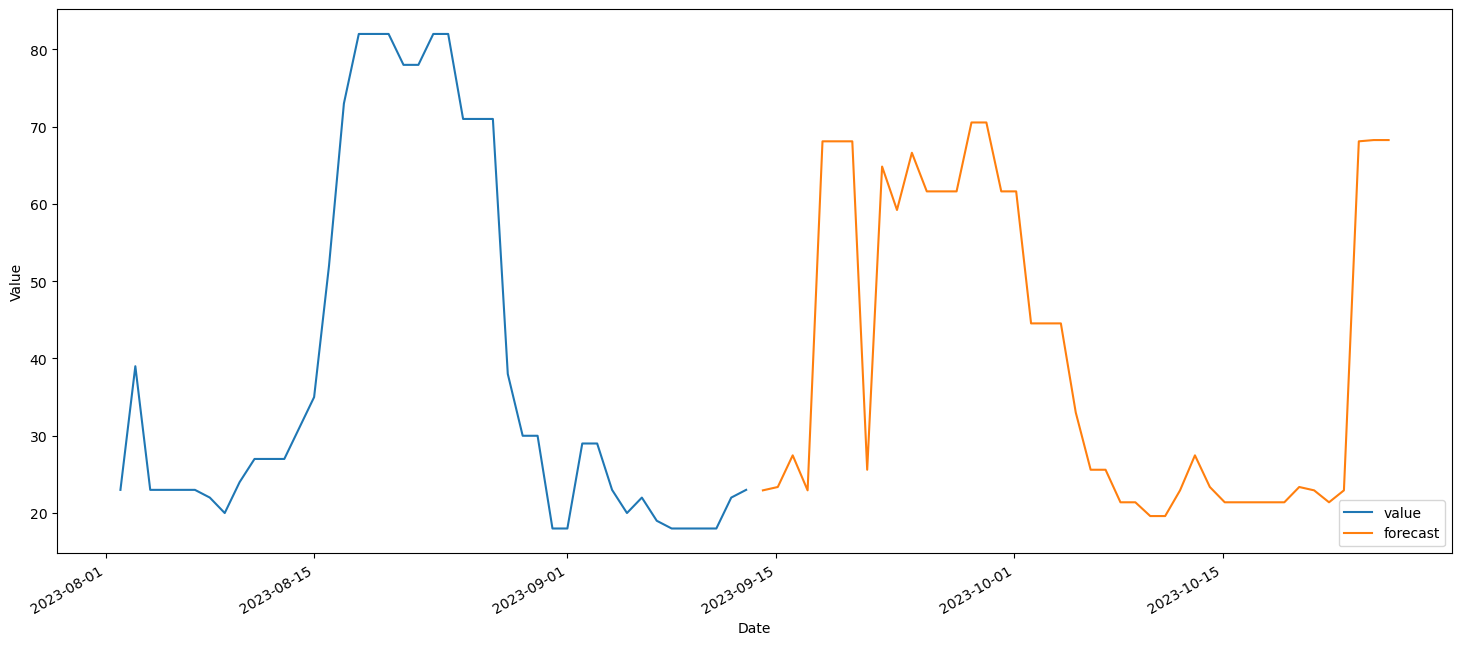

In [46]:
plt.figure(figsize=(18,8))
df['value'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

<Axes: xlabel='collectTime'>

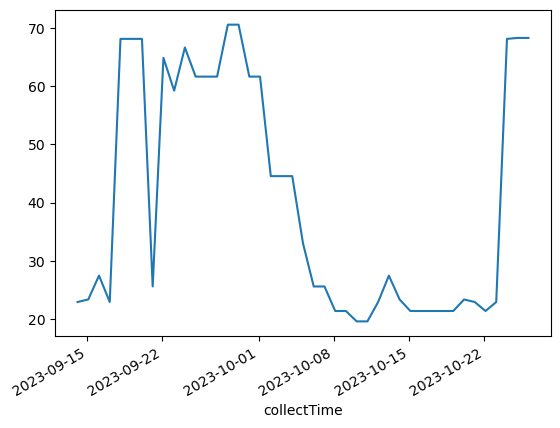

In [47]:
df['forecast'].plot()

In [48]:
result_df = df[df['forecast'] > 60]


In [49]:
first_index_greater_than_60 = (df['forecast'] > 60).idxmax()
timestamp_obj = pd.Timestamp(first_index_greater_than_60)
datetimeobj = timestamp_obj.to_pydatetime()
date_format = '%d.%m.%Y'
dateofpredict = datetimeobj.strftime(date_format)


In [50]:
url = 'your url'
myobj = {'parametername': 'pythontest', 'parametervalue': dateofpredict}

x = requests.post(url, myobj)

print(x.text)

{"updatetime":"2023-09-18T13:37:06.4894167+03:00","parametername":"pythontest","parametervalue":"18.09.2023"}
